In [4]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
from Distancias import *
from Verificador import *
from MatrizConfusion import MatrizConfusion
import sys


In [ ]:
"""
Apartado 1 ==> Descripciones básicas de implementación <==


==> Generación de la población inicial con especial indicación del número de reglas por individuo consideradas <==

Para inicializar la poblacion hemos optado por marcar al usuario unos margenes en cuanto al numero de reglas y al numero
de individuos. En cuanto al primero, hemos tenido especial cuidado con los recursos de los que disponemos puesto, que como
ya sabemos este tipo de algoritmos requiere de un coste computacional alto, y ello se ha visto reflejado a la hora de hacer 
las pruebas. Por tanto, marcamos un número máximo de reglas posibles, y para cada individuo en particular,
empleamos las funciones de rand, buscando asi la mayor aleatoriedad posible.

Por otra parte, y como ya se comento en las diferentes clases, el uso de reglas donde todos los alelos valen 1 o 0, no
serán de gran ayuda y es por ello, que al crear cada regla del individuo, se verifica que esta condicion no se da,
y en caso de que se de, se muta uno de los alelos para asi conseguir ya una regla valida.

Cuando estos individuos ya estan creados y verificados todos ellos son añadidos a una población que se albergará y sobre 
la que se trabajará durante todas las pruebas, logicamente.


==> Mecanismo de cruce implementado <==

En cuanto al cruce implementado, recordamos la posibilidad de realizar cruces con otras reglas de otros progenitores,
asi como intercambiar las reglas con otros progenitores. Para el primer tipo (que es la forma predeterminada de trabajar
de nuestro algoritmo), se comprueba la probabilidad introducida por el usuario y se genera un número aleatorio entre 0 y 1. 
En caso de ser inferior a la porbabilidad marcada por el usuario, se realizará ese cruce. 
Es entonces donde verificamos cuantas reglas hay por individuo, y escogemos aleatoriamente cual de esas serán 
las elegidas para el cruce y aleatoriamente escogemos el punto de cruce.

Por otra parte, para inter, el proceso a seguir es muy similar, excepto el último paso, donde no escogemos el punto
de cruce, pues no es necesario, y en su lugar, se intercambian directamente las reglas al completo.


==> Mecanismo de mutación implementado <==

Para desarrollar mutación hemos implementado, 3 posibles tipos de mutación donde la más "común" que hemos usado para
las pruebas es la de bit-flip. Las otras dos, recordamos que buscan añadir o eliminar una de las reglas del individuo,
con sus posteriores verificaciones. Si nos centramos en la primera, primero debemos verificar el número de reglas de
las que dispone el individuo, y decidir sobre cual de ellas se analizará la mutación de este tipo. A partir de ello
escogemos, alelo a alelo una probabilidad aleatoria que de ser inferior a la probabilida de mutación escogida por el usuario
se realizará ese cambio en ese bit. Por último chequeamos que esta regla afectada, no es una regla unidad
, o completa de ceros ya que de ser habra que modificar algún bit aleatoriamente para que sea válida.

Para el tipo de mutación en el que añadimos una regla, verificamos que dado el individuo concreto, este no tiene ya
el máximo posible de reglas que permite el algoritmo. De lo contrario, se verifica que la probabilidad de mutación sea inferior
a la indicada y a partir de este punto, consiste básicamente en un proceso similar a la inicialización de la población pero
con una única regla sobre un único individuo.
Por otro lado, el tipo de mutación donde se le elimina una regla, parte de verificar que el individuo en cuestión
alberga 2 reglas, para que al menos pueda seguir trabajando en la población con el mínimo requerido. Entonces, aleatoriamente
se escoge cual de estas será eliminada y se borra del progenitor.


==> Mecanismo de clasificación implementado <==

Es aqui donde requerimos unos recursos suficientes, puesto que nuestra idea es clasificar todas las instancias correspondientes
con las reglas de un individuo. Conociendo esto de antemano, la función de clasificación se centra en
recoger todos los atributos del dataset, y escogiendo cada instancia del fichero de datos, analizar para una regla completa,
cada parte de la misma con la parte correspondiente del dataset (recordemos en codificación One Hot). 
En caso de que todos los atributos de la regla se activen con los atributos del ejemplo del dataset, se activaría la regla 
y se añade la clase de la regla a la lista de clases predichas. 
Finalmente, cuando ya se hana probado todas las reglas del individuo, se elige la clase a predecir mediante un voto 
por mayoría de todas las predicciones de las reglas.
Si se diera el caso de que ninguna regla del individuo se ha activado, la clase que se predeciría por defecto es 0.
"""

In [5]:
fileName="ConjuntosDatos/titanic.data"
datos_titanic = Datos(fileName)
fileName2="ConjuntosDatos/tic-tac-toe.data"
datos_tictactoe = Datos(fileName2)

# Creamos las validaciones
validacion_simple = ValidacionSimple(75,10)
validacion_cruzada = ValidacionCruzada(6)

Mejor individuo: [array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]), array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]), array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]), array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]), array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1]), array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]), array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]), array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]), array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]), array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])]


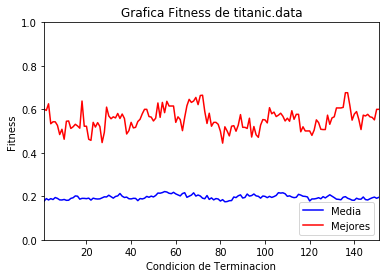


Algoritmo Genetico: 0.30651340996168586


In [2]:
ag_titanic = ClasficadorAlgoritmoGenetico( 
                    tam_poblacion=150, cond_terminacion=150, max_reglas=10, 
                    tipo_cruce = 0, tipo_mutacion=0, prob_cruce=0.5, 
                    prob_mutacion=0.5)

medias_titanic = ag_titanic.validacion(validacion_simple, datos_titanic, filename=fileName)
print("\nAlgoritmo Genetico: " + str(medias_titanic[0]))


Mejor individuo: [array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1]), array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1]), array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1]), array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0]), array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0]), array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0]), array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1]), array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1]), array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1]), array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0,

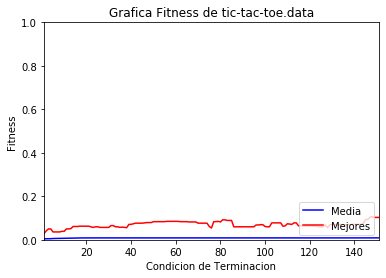


Algoritmo Genetico: 0.6443514644351465


In [2]:
ag_tictactoe = ClasficadorAlgoritmoGenetico( 
                    tam_poblacion=150, cond_terminacion=150, max_reglas=10, 
                    tipo_cruce = 1, tipo_mutacion=1, prob_cruce=0.5, 
                    prob_mutacion=0.9)

medias_tictactoe = ag_tictactoe.validacion(validacion_simple, datos_tictactoe, filename=fileName2)
print("\nAlgoritmo Genetico: " + str(medias_tictactoe[0]))


In [ ]:
"""
Apartado 2 ==> Resultados de clasificación para los conjuntos de prueba <==

/* Conjunto de prueba de Titanic.data */

Aquella configuración para titanic.data con la que hemos obtenido unos buenos resultados, es aquella donde jugamos 
especialmente con las tasas de cruce y mutación. LLegar a esa conclusión, supuso, un lote de pruebas bastante exhaustivo, 
para el cual marcamos un orden, en cuanto a buscar los mejores resultados.

La mejor configuración es la siguiente:
    * tamaño población => 150
    * numero de generaciones => 150
    * Maximas reglas posibles por individuo => 10
    * tipo de cruce = 0 (cruce intra)
    * tipo de mutación = 0 (modificación bitflip)
    * tasa de cruce = 0.5
    * tasa de mutación = 0.5
    
Tasa de error obtenida => 0.306
         
    
En ella vemos como la población escogida se encuentra en el máximo del intervalo propuesto. El uso de una plobación superior,
hace que la ejecución resulte bastante más lenta, y en cierto modo innecesaria, puesto que podemos cubrir el número de 
posibles soluciones con la población escogida y aumentando, en caso de ser necesario el número de reglas máximo por
individuo. En cuanto, al número de generaciones empleamos 150, para (de un modo similar al anterior) tener la capacidad
de para una misma prueba, conseguir, que la población converga en un valor resultante óptimo, y una media de generación
bastante satisfactória.

Hemos observado, durante las pruebas realizadas que un factor bastante determinante es la variación del
número de reglas máximas por individuo y la tasa de cruce. Esta última, la hemos variado desde 0.1 hasta 1.0, y ha sido
con valores de 0.5 y número de reglas cercano a 10 cuando ha devuelto tasas de error de entre 0.2 y 0.3.
Asi mismo el emplear una tasa de cruce superior a 0.5, podría alterar en exceso las reglas conseguidas por un buen individuo
y es por ello por lo que la importancia de esta elección debía tenerse en cuenta.
En cuanto a la tasa de mutación como se recomienda siempre debe ser bastante pequeña, sin embargo, para este conjunto
de datos, debemos entender que al emplear el tipo 0 (cruce bitflip) y tener una probabilidd relativamente alta de mutación,
pueden cambiar con mucha facilidad el signo de cada uno. No obstante, este dataset cuenta con pocos atributos, aunque si
con los suficientes valores en cada aributo como para probar estas condiciones; a diferencia de lo que pasa en tic-tac-toe.data.

Reglas del mejor individuo (titanic.data) y su interpretación:
        (1 atributo) => 3 bits // (2 atributo) =>  2 bits // (3 atributo) => 16 bits // Clase => 1 bit
        
       1.[0 1 0] [1 1] [0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1] [1]
       
        => if(atr1=v2) and (atr2=v1 or atr2=v2) and (atr3=v4 or atr3=v6 or atr3=v7 or atr3=v9 or atr3=v10 or atr3=v12 or atr3=v13 or atr3=v15 or atr3=v16) then 1
       
       2.[1 0 1] [0 1] [1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1] [0]
       
        => if(atr1=v1 or atr1=v3) and (atr2=v2) and (atr3=v1 or atr3=v2 or atr3=v3 or atr3=v4 or atr3=v6 or atr3=v7 or atr3=v10 or atr3=v11 or atr3=v13 or atr3=v14 or atr3=v15 or atr3=v16) then 0
       
       3.[0 0 0] [1 0] [1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1] [0]
       
        => if(atr2=v1) and (atr3=v1 or atr3=v2 or atr3=v3 or atr3=v4 or atr3=v5 or atr3=v6 or atr3=v11 or atr3=v12 or atr3=v14 or atr3=v15 or atr3=v16) then 0
       
       4.[1 1 1] [1 0] [1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0] [1]
       
        => if(atr1=v1 or atr1=v2 or atr1=v3) and (atr2=v1) and (atr3=v1 or atr3=v3 or atr3=v4 or atr3=v5 or atr3=v9 or atr3=v12 or atr3=v13 or atr3=v14 or atr3=v15) then 1
       
       5.[0 1 0] [1 1] [1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1] [1]
       
        => if(atr1=v2) and (atr2=v1 or atr2=v2) and (atr3=v1 or atr3=v8 or atr3=v11 or atr3=v12 or atr3=v15 or atr3=v16) then 1
       
       6.[1 0 0] [0 0] [0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1] [1]

        => if(atr1=v1) and (atr3=v2 or atr3=v6 or atr3=v9 or atr3=v12 or atr3=v13 or atr3=v14 or atr3=v15 or atr3=v16) then 1
       
       7.[1 1 0] [1 1] [0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1] [1]
       
        => if(atr1=v1 or atr1=v2) and (atr2=v1 or atr2=v2) and (atr3=v3 or atr3=v4 or atr3=v5 or atr3=v6 or atr3=v7 or atr3=v10 or atr3=v12 or atr3=v16) then 1
       
       8.[0 0 1] [1 1] [0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0] [1]
       
        => if(atr1=v3) and (atr2=v1 or atr2=v2) and (atr3=v3 or atr3=v5 or atr3=v6 or atr3=v8 or atr3=v10 or atr3=v15) then 1
       
       9.[0 1 1] [1 1] [0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0] [0]
       
        => if(atr1=v2 or atr1=v3) and (atr2=v1 or atr2=v2) and (atr3=v3 or atr3=v5 or atr3=v6 or atr3=v7 or atr3=v9 or atr3=v10 or atr3=v12 or atr3=v13 or atr3=v15) then 0
       
       10.[1 1 1] [0 1] [0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1] [0]
       
        => if(atr1=v1 or atr1=v2 or atr1=v3) and (atr2=v2) and (atr3=v3 or atr3=v4 or atr3=v5 or atr3=v6 or atr3=v8 or atr3=v10 or atr3=v13 or atr3=v15 or atr3=v16) then 0


/* Conjunto de prueba de Tic-Tac-Toe.data */
    
En cuanto a este dataset, por muchas pruebas realizadas, variando todo tipo de parámetros no hemos llegado a resultados,
tan buenos como los del dataset anterior. Es por ello que hemos escogido la configuración que, aún no siendo la mejor,
al menos es capaz de clasificar algunas de las instancias correctamente.

La mejor configuración es la siguiente:
    * tamaño población => 150
    * numero de generaciones => 150
    * Maximas reglas posibles por individuo => 10
    * tipo de cruce = 1 (cruce inter)
    * tipo de mutación = 1 (mutación adición de regla)
    * tasa de cruce = 0.5
    * tasa de mutación = 0.9
    
Tasa de error obtenida => 0.644

En cuanto a los datos de población y generaciones escogidas hemos seguido, la dinámica del conjunto de datos anterior,
un poco, por las dimensiones del problemas y los tiempos de ejecución, y porque es una forma de compensar estas variables,
que tampoco influyen para mal en el problema.

Es por ello, que para este problema es necesario comentar los cuatro criterios finales.
Comenzando por el tipo de cruce. Dada la dificultad de sacar reglas desde un principio válidas para un individuo, cortar
dado un punto, puede ser una técnica poco productiva en este contexto. Recordemos que este dataset consta de 9 atributos,
mientras que el anterior constaba de 3. Esto se traduce, en que es mucho más costoso conseguir una regla válida, si lo que
querémos es mantener el patron del esquema. Es decir, necesitamos muchas más conjunciones (relaciones and) que or, puesto
que para cada atributo, los posibles valores que recibe cada uno siempre son 3. Por tanto, la dificultad de este problema
crece conforme más atributos tenga y se dobla esa dificultad cada vez que añadimos nuevos atributos.

Este es el principal motivo de porque, hemos escogido el tipo de mutación 1 (adición de una regla), debido a que, si nuestro
espectro de posibles reglas puede haber aumentado en miles de instancias nuevas, será necesario garantizar a los individuos,
que puedan acceder a esas nuevas reglas conforme avancen las generaciones. Debido a esto, la tasa que se aplica de mutación,
llega casi a la unidad, puesto que nos interesa que todos (en general, para aumentar esa media de población) ganen fitness,
mientras que la tasa de cruce creemos que debe quedarse en el 0.5, para equilibrar el cambio de reglas adecuadas e innadecuadas.

Reglas del mejor individuo (tictactoe.data) y su interpretación:
        (1 atributo) => 3 bits // (2 atributo) =>  3 bits //  (3 atributo) =>  3 bits
        (4 atributo) => 3 bits // (5 atributo) =>  3 bits //  (6 atributo) =>  3 bits
        (7 atributo) => 3 bits // (8 atributo) =>  3 bits //  (9 atributo) =>  3 bits // Clase => 1 bit

    1.[1 0 1] [1 1 1] [1 1 0] [1 1 0] [1 1 1] [1 1 0] [1 1 1] [1 0 0] [1 1 1] [1]
    
    ==> if(atr1=v1 or atr1=v3) and
      (atr2=v1 or atr2=v2 or atr2=v3) and
      (atr3=v1 or atr3=v2) and
      (atr4=v1 or atr4=v2) and
      (atr5=v1 or atr5=v2 or atr5=v3) and
      (atr6=v1 or atr6=v2) and
      (atr7=v1 or atr7=v2 or atr7=v3) and
      (atr8=v1) and
      (atr9=v1 or atr9=v2 or atr9=v3) then 1
    
    
    2.[0 1 1] [0 1 0] [1 0 0] [0 1 1] [1 0 0] [0 1 0] [0 1 0] [0 0 1] [1 0 0] [1] 
    
    ==> if(atr1=v2 or atr1=v3) and
      (atr2=v2) and
      (atr3=v1) and
      (atr4=v2 or atr4=v3) and
      (atr5=v1) and
      (atr6=v2) and
      (atr7=v2) and
      (atr8=v3) and
      (atr9=v1) then 1
    
    3.[1 0 1] [0 0 1] [0 0 1] [0 1 1] [1 0 1] [0 1 1] [1 1 1] [1 1 1] [1 1 1] [1] 

    ==> if(atr1=v1 or atr1=v3) and
      (atr2=v3) and
      (atr3=v3) and
      (atr4=v2 or atr4=v3) and
      (atr5=v1 or atr5=v3) and
      (atr6=v2 or atr6=v3) and
      (atr7=v1 or atr7=v2 or atr7=v3) and
      (atr8=v1 or atr8=v2 or atr8=v3) and
      (atr9=v1 or atr9=v2 or atr9=v3) then 1
      
    4.[0 0 0] [0 1 1] [0 0 1] [0 1 0] [0 1 1] [0 1 1] [1 0 0] [1 0 0] [0 0 1] [0]
    
    ==> if(atr2=v2 or atr2=v3) and
      (atr3=v3) and
      (atr4=v2) and
      (atr5=v2 or atr5=v3) and
      (atr6=v2 or atr6=v3) and
      (atr7=v1) and
      (atr8=v1) and
      (atr9=v3) then 0
      
    5.[0 1 1] [0 1 1] [1 0 0] [0 1 1] [1 1 1] [1 0 1] [1 0 1] [1 1 1] [1 0 1] [0]
    
    ==> if(atr1=v2 or atr1=v3) and
      (atr2=v2 or atr2=v3) and
      (atr3=v1) and
      (atr4=v2 or atr4=v3) and
      (atr5=v1 or atr5=v2 or atr5=v3) and
      (atr6=v1 or atr6=v3) and
      (atr7=v1 or atr7=v3) and
      (atr8=v1 or atr8=v2 or atr8=v3) and
      (atr9=v1 or atr9=v3) then 0
    
    6.[0 1 1] [0 0 1] [1 0 1] [0 0 1] [0 1 0] [1 0 1] [1 0 0] [1 0 0] [0 1 1] [0]
    
    ==> if(atr1=v2 or atr1=v3) and
      (atr2=v3) and
      (atr3=v1 or atr3=v3) and
      (atr4=v3) and
      (atr5=v2) and
      (atr6=v1 or atr6=v3) and
      (atr7=v1) and
      (atr8=v1) and
      (atr9=v2 or atr9=v3) then 0    
    
    7.[1 1 1] [1 0 1] [1 1 0] [1 1 0] [0 1 1] [1 0 1] [1 0 0] [1 1 1] [0 1 1] [1]
    
    ==> if(atr1=v1 or atr1=v2 or atr1=v3) and
      (atr2=v1 or atr2=v3) and
      (atr3=v1 or atr3=v2) and
      (atr4=v1 or atr4=v2) and
      (atr5=v2 or atr5=v3) and
      (atr6=v1 or atr6=v3) and
      (atr7=v1) and
      (atr8=v1 or atr8=v2 or atr8=v3) and
      (atr9=v2 or atr9=v3) then 1    
    
    8.[1 0 0] [1 0 1] [1 1 0] [0 0 1] [0 0 0] [1 1 0] [1 0 1] [0 0 0] [0 0 1] [1] 
    
    ==> if(atr1=v1) and
      (atr2=v1 or atr2=v3) and
      (atr3=v1 or atr3=v2) and
      (atr4=v3) and
      (atr6=v1 or atr6=v2) and
      (atr7=v1 or atr7=v3) and
      (atr9=v3) then 1    
    
    9.[1 1 1] [1 1 1] [0 1 1] [1 0 1] [1 1 1] [0 1 0] [0 1 0] [0 0 1] [1 1 0] [1]
    
    ==> if(atr1=v1 or atr1=v2 or atr1=v3) and
      (atr2=v1 or atr2=v2 or atr2=v3) and
      (atr3=v2 or atr3=v3) and
      (atr4=v1 or atr4=v3) and
      (atr5=v1 or atr5=v2 or atr5=v3) and
      (atr6=v2) and
      (atr7=v2) and
      (atr8=v3) and
      (atr9=v1 or atr9=v2) then 1    
    
    10.[0 1 0] [1 0 1] [1 1 1] [1 0 1] [0 1 1] [1 1 1] [0 1 1] [0 0 1] [1 1 1] [1]

    ==> if(atr1=v2) and
      (atr2=v1 or atr2=v3) and
      (atr3=v1 or atr3=v2 or atr3=v3) and
      (atr4=v1 or atr4=v3) and
      (atr5=v2 or atr5=v3) and
      (atr6=v1 or atr6=v2 or atr6=v3) and
      (atr7=v2 or atr7=v3) and
      (atr8=v3) and
      (atr9=v1 or atr9=v2 or atr9=v3) then 1

"""

In [ ]:
"""Apartado 3 ==> Analisis de resultados <=="""

In [ ]:
"""
Importancia del numero de reglas

Como veremos más adelante el número de reglas, dadas las condiciones especificadas en la práctica es un pilar clave, para
obtener una solución óptima y sin necesidad de emplear un mayor número de individuos, o un mayor número de generaciones.
Es una forma muy útil de evitar desempates durante la clasificación y además supone tener a priori un mayor número de reglas,
que aún siendo escogidas aleatoriamente, dado el numero de atributos que las componenen, siempre será preferible.
Si entendemos como un dataset donde para cada atributo encontramos posibles valores (y encontramos pocos atributos),
las reglas serán de una representación más corta, y por tanto, para un mismo individuo, se podrá albergar un 
gran número de posibles soluciones. 

En cuanto a titanic.data nos ha sido suficiente emplear 10 reglas para obtener bastante buenos resultados. 
Para este conjunto, donde la representación de una regla se realiza a partir de 22 bits, parece que esta elección es la adecuada,
teniendo en cuenta además que durante las pruebas probamos hasta con un máximo de 60 reglas, observamos que el tiempo 
invertido en salir de la convergencia a la que habíamos llegado, era una perdida innecesaria de tiempo y esfuerzo.

Por otro lado, hemos empleado una normal similar para el dataset de tictactoe.data, puesto que aunque encontramos resultados,
muchos mejores conforme aumentamos el número de reglas, no creemos util mostrar todas ellas. Estamos hablando de más de 300 reglas,
las que nos han devuelto un error de 0.4, que en comparazción con el obtenido con 10 reglas, resulta algo inutil.
Dicho de otro modo sería una forma de abarcar todas o casi todas las posibles instancias de prueba.
"""

In [ ]:
"""
Tamaño de la población

Como ya sabemos, la inicialización de la población puede resultar ser, un criterior fundamental a la hora de emplear algoritmos
genéticos, pues dependerá de la naturaleza del problema, el que sean necesarios más o menos individuos. Normalmente,
una población inicial va desde los cientos a miles de inidividuos, y logicamente, se generá de forma aleatoria, de tal
modo que podamos cubrir todo el espectro de posibles soluciones para este problema concreto. Otra forma de decidir el número
de individuos es aprovechar el conocimiento del problema a solucionar, y entonces tratar de generar posibles inidivudos
de una forma concreta, para generar unas determinadas soluciones, que serán posiblemente más válidas frente a otras.

Si extrapolamos esto a nuestro contexto, nos daremos cuenta que, partimos de una cierta diferencia frente a lo dicho 
anteriormente, y es que, nosotros tenemos la posibilidad de aplicar más de una regla a un inidividuo. Con ello, puede 
no ser necesario generar una población de miles de individuos, sino generar los suficientes para que entre la suma de sus reglas
se abarque todas o casi todas las soluciones posibles.

En cuanto a titanic.data, la población escogida ha sido de 150 individuos, y como hemos comentado previamente, esto no
parece una locura. Si, entendemos que en una mayor población, el grupo de elitistas será superior, es posible que entre,
ellos mismos, salgan aquellos superindividuos que traigan consigo reglas con muy buenos resultados de fitness.
Claro está, que esta condición, implica de por si, una necesidad en el tiempo de entrenamiento para una única generación, lo cual a la larga,
puede suponer una elección mejorable.

Por otra parte, para tic-tac-toe.data vemos como emplear una población mayor, no ha retornado unos buenos resultados,
por ello hemos preferido, enfocando el tiempo de ejecución como criterio principal, emplear el mismo número de 
población, que con el dataset titanic.data.
"""

In [ ]:
"""
Generaciones

Como es lógico pensar, cuantas más generaciones se empleen, mejores individuos emplearemos y aunque no todos sean válidos,
aumentará el pocentaje de individuos con mayor fitnness respecto los demás. Es decir, tendremos en cuenta un mayor número
de individuos con un fitnness superior. Podemos verlo como que aquellos individuos que tiene una mejor adaptación (un 
mayor fitnness) propagarán sus genes en sucesivas generaciones y con ello probablemente se conseguirá lo que conocemos
como "superindividuos". Por tanto, a lo largo de las generaciones las buenas características de cada individuo se van 
propagando a través de la población y empleando el cruce entre individuos, logramos explorar distintas areas de búsquedad,
que durante generaciones primitivas era imposible.

Para comprender aún más la importancia de las generaciones, podemos hacer uso de la definición de convergencia empleada
por Kenneth A. de Jong, donde nos comenta que la influencia del número de generaciones será un factor fundamental,
en la adaptación media extendida a todos los individuos de la población, asi como la adaptación del mejor individuo, que
iran convergiendo en un óptimo global.

Es decir, este concepto de convergencia de la progresión hace referencia a  cuando al menos el 95% de la población, comparten
el mismo valor para dicho gen. Por tanto, cuando todos los genes hayan convergido, la población general será óptima.

Para el conjunto de datos de titanic.data y tictactoe.data escogemos 150 generaciones de entrenamiento, 
debido a que es una forma de asegurar que conseguimos un resultado adecuado, y que en caso de haber entrado en un 
mínimo local, es una manera de intentar escapar de el. Aún asi, debemos comprender la dificultad que esta tarea, 
pues una vez que un algoritmo converge, es muy complejo realizar alguna mejora sobre el, que muestre resultados 
más adecuados, sin prescindiendir de esa capacidad de generlización.
"""

In [ ]:
"""
Tasa de Cruce y Tasa de Mutación

Sabemos que el cruce es una parte fundamental al generar progenitores, y es por ello, que esa gran influencia que genera
sobre los descendientes hace que sea un factor muy delicado con el que trabajar. Con forme esta tasa sea más alta,
se dará una mayor diversidad en la descendencia y con ello, podemos estar alejandonos de esa convergencia que buscamos 
ansiadamente. Dicho de otro modo, es muy aconsejable no cruzar un determinado número de individuos, para evitar quedarnos
estancados en óptimos locales, y asi tratar de buscar en todo momento el óptimo global.

Por otro lado contamos con la tasa de mutación como una forma alternativa de salir de esos mínimos locales. Aún asi,
su capacidad de ajuste rara vez es bueno, puesto que no tienen en cuenta la historia del resto de generaciones. Por tanto,
consideramos que es preferebile no emplear una tasa alta de mutación para no introducir individuos no deseados.

Respecto el conjunto de datos de titanic.data, ambas tasas han resultado estar en la mitad del intervalo propuesto.
Necesitamos que aquellos individuos con mejor fitness se mantengan en los valores que obtenien durante las primeras
generaciones. Un cambio brusco (con cmabios bitflip o de cruce superiores a 0.5-0.6) en los datos podría provocar 
descensos pronunciados en cuanto al fitness, y aunque en este dataset no parece ser el caso (por el numero de atributos 
y las condiciones and necesarias entre atributos) en el dataset de tic-tac-toe.data al tener muchos atributos 
necesitamos que dada una regla concreta, esta mantenga su forma durante todo el entrenamiento, ya que al mínimo cambio, 
puede dejar de ser una conjunción de atributos válida.

Enlazando con lo dicho previamente, la tasa de cruce para tictactoe.data debe encontrarne en 0.5 pues al emplear el tipo
de cruce 1 (intercambio completo de reglas), debemos procurar intercambiar aquellas que puedan ser productivas para un individuo,
y por otro lado intentar deshacerse de aquellas que no son un esquema válido para las instancias de prueba.
En cambio la tasa de mutación, debe ser lo más alta posible. Esta idea surge de la posibilidad de al emplear el tipo de
mutación 2 (adición de regla), de añadir reglas, que puedan ayudar a subir el fitness, del individuo en cuestión, y por tanto
de la población en general.
"""

In [ ]:
"""
Apartado 4 ==> Forma gráfica de fitness medio y del mejor individuo <==
"""

Dataset Titanic:


	==> Algoritmo Genetico:

Matriz Confusion        Real
           |   1    62.0  29.0
 Estimado  |   0    51.0  119.0


	 ==> Naive Bayes:

Matriz Confusion        Real
           |   1    75.7  23.1
 Estimado  |   0    34.7  127.5


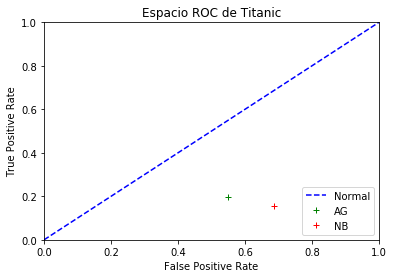

In [10]:
mx1 = MatrizConfusion()
print("Dataset Titanic:\n\n")
print("\t==> Algoritmo Genetico:\n")
"""medias_titanic=[] ESTO SE DEBE QUITAR LUEGO
medias_titanic.append(0.30651340996168586)
medias_titanic.append(62.0)
medias_titanic.append(29.0)
medias_titanic.append(119.0)
medias_titanic.append(51.0)"""
ag_tpr_titanic, ag_fpr_titanic = mx1.matrix_media(medias_titanic[1], 
                            medias_titanic[1], 
                            medias_titanic[2], 
                            medias_titanic[2], 
                            medias_titanic[3], 
                            medias_titanic[3], 
                            medias_titanic[4], 
                            medias_titanic[4])

Clasificador = ClasificadorNaiveBayes()
medias_titanic_NB = Clasificador.validacion(validacion_simple, datos_titanic, True)
print("\n\n\t ==> Naive Bayes:\n")
nb_tpr_titanic, nb_fpr_titanic = mx1.matrix_media(medias_titanic_NB[1], 
                            medias_titanic_NB[1], 
                            medias_titanic_NB[2], 
                            medias_titanic_NB[2], 
                            medias_titanic_NB[3], 
                            medias_titanic_NB[3], 
                            medias_titanic_NB[4], 
                            medias_titanic_NB[4])

plot_points = [[ag_fpr_titanic, ag_tpr_titanic, 'AG'], [nb_fpr_titanic, nb_tpr_titanic,'NB']]
mx1.plot(plot_points,"Titanic")


Dataset Tit Tac Toe:


	 => Algoritmo Genetico:

[0.6443514644351465, 19.0, 6.0, 66.0, 148.0]
Matriz Confusion        Real
           |   1    19.0  6.0
 Estimado  |   0    148.0  66.0


	 => Naive Bayes:

Matriz Confusion        Real
           |   1    133.6  48.5
 Estimado  |   0    22.7  34.2


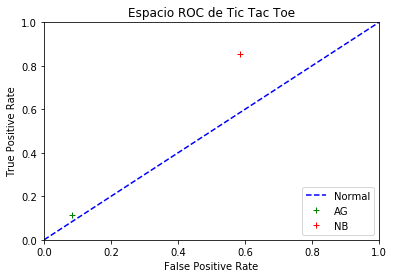

In [12]:
mx1 = MatrizConfusion()
print("Dataset Tit Tac Toe:\n\n")
print("\t => Algoritmo Genetico:\n")
"""medias_tictactoe=[] ESTO SE DEBE QUITAR LUEGO
medias_tictactoe.append(0.6443514644351465)
medias_tictactoe.append(19.0)
medias_tictactoe.append(6.0)
medias_tictactoe.append(66.0)
medias_tictactoe.append(148.0)"""
print(medias_tictactoe)

ag_tpr_tictactoe, ag_fpr_tictactoe = mx1.matrix_media(medias_tictactoe[1], 
                            medias_tictactoe[1], 
                            medias_tictactoe[2], 
                            medias_tictactoe[2], 
                            medias_tictactoe[3], 
                            medias_tictactoe[3], 
                            medias_tictactoe[4], 
                            medias_tictactoe[4])

medias_tictactoe_NB = Clasificador.validacion(validacion_simple, datos_tictactoe, True)

print("\n\n\t => Naive Bayes:\n")
nb_tpr_tictactoe, nb_fpr_tictactoe = mx1.matrix_media(medias_tictactoe_NB[1], 
                            medias_tictactoe_NB[1], 
                            medias_tictactoe_NB[2], 
                            medias_tictactoe_NB[2], 
                            medias_tictactoe_NB[3], 
                            medias_tictactoe_NB[3], 
                            medias_tictactoe_NB[4], 
                            medias_tictactoe_NB[4])

plot_points = [[ag_fpr_tictactoe, ag_tpr_tictactoe, 'AG'], [nb_fpr_tictactoe, nb_tpr_tictactoe,'NB']]
mx1.plot(plot_points,"Tic Tac Toe")


In [ ]:
"""
Apartado 5 ==> Análisis ROC para los conjuntos de datos tic-tac-toe y titanic con Naive-Bayes y el clasificador genético <==
"""